In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# source the nxcals python libs
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
from datetime import datetime

In [39]:
# build the query and load data into spark dataframe UTC Time
start = "2022-09-28 16:00:00.000"
end = "2022-09-28 17:00:00.000"
# df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("BXMWPC_2080/Acquisition").build().toPandas()
df_QSE = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PR.QSE/Acquisition").build().toPandas()

In [36]:
df_QSE.selector.unique()

array([], dtype=object)

In [34]:
df.keys()

Index(['__record_timestamp__', '__record_version__', 'acqMsg', 'acqStamp',
       'acqState', 'acqTime', 'beamID', 'class', 'coincidenceDeviceName',
       'cycleTime', 'cyclestamp', 'device', 'deviceDetailedStatus',
       'deviceHwStatus', 'deviceName', 'equipmentName', 'event', 'gasOk',
       'highVoltage', 'highVoltageMode', 'highVoltageOn', 'highVoltageStatus',
       'inOutPosition', 'moduleWdAcquisition', 'moduleWdMonitor',
       'profileHoriz', 'profileHorizFiltered', 'profileHorizOffset1',
       'profileHorizOffset8', 'profileVert', 'profileVertFiltered',
       'profileVertOffset1', 'profileVertOffset8', 'property', 'selector',
       'superCycleNb', 'wireSpacingHorz', 'wireSpacingVert',
       'nxcals_entity_id'],
      dtype='object')

In [9]:
t = [datetime.fromtimestamp(ts) for ts in df.loc[df.selector == "CPS.USER.MD4"].acqStamp/1e9]
profileHoriz = df.loc[df.selector == "CPS.USER.MD4"].profileHoriz

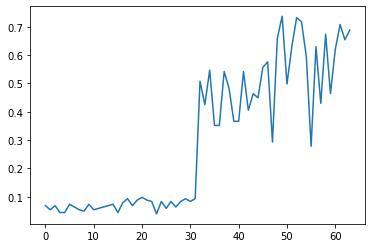

In [20]:
plt.plot(profileHoriz[2]["elements"])